<a href="https://colab.research.google.com/github/ZhuoyaLi412/STSCI-5740-Final-Project/blob/main/5740Final_Project_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Depression Outcomes: A Comparative Study of Traditional Machine Learning Models and Large Language Models**
## STSCI 5740 Final Project

Team Member: Zhuoya Li (zl928), Kellan Liu (ql348), Zhichao Song (zs398)

## **Part 1: Traditional Machine Learning**
## Installs and Imports

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
drive.mount('/content/drive')

In [ ]:
# Change the directory path if needed
os.chdir('/content/drive/MyDrive/STATS_5740_Final_Project')

In [ ]:
print(os.getcwd())

/Users/kellan/Downloads/STATS_5740_Final_Project


In [ ]:
df = pd.read_csv('train.csv')

## Exploration Data Analysis

In [ ]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df.isna().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
df[df.select_dtypes(exclude=['number', 'bool']).columns].nunique()

Name                                     422
Gender                                     2
City                                      98
Working Professional or Student            2
Profession                                64
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Family History of Mental Illness           2
dtype: int64

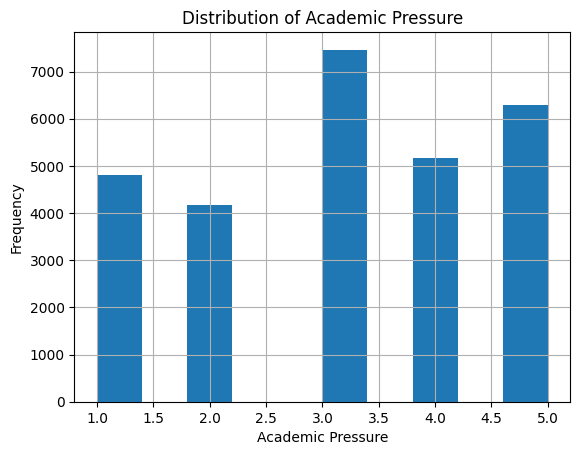

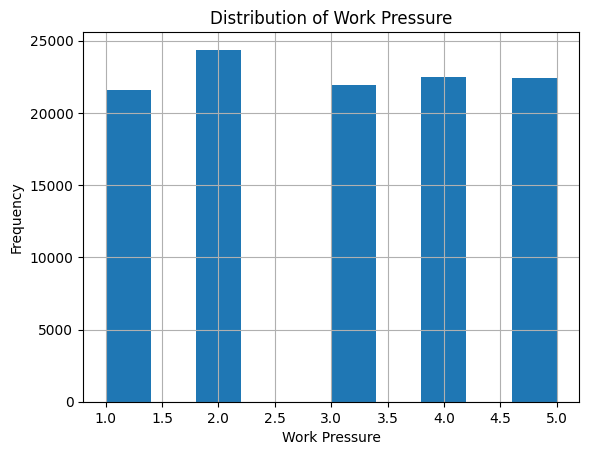

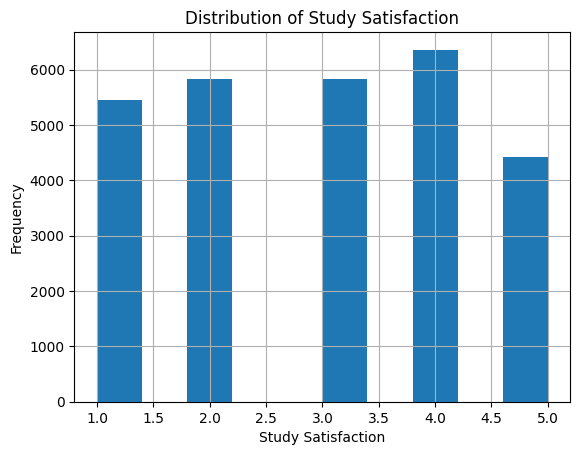

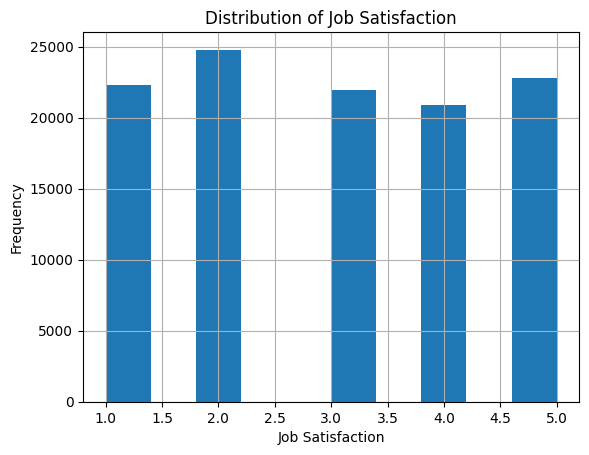

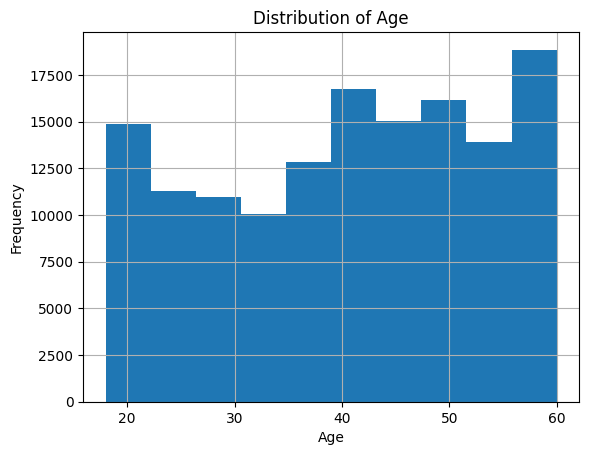

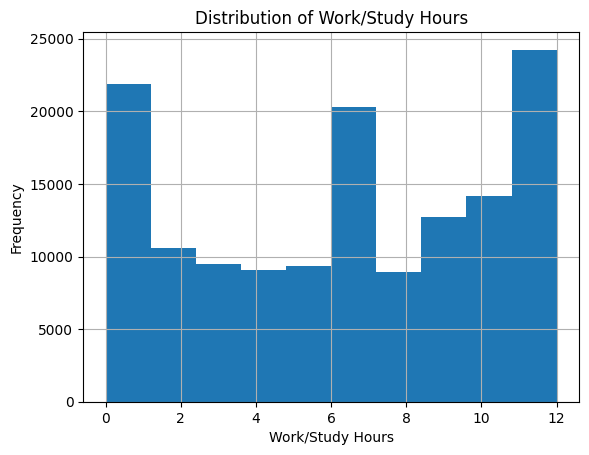

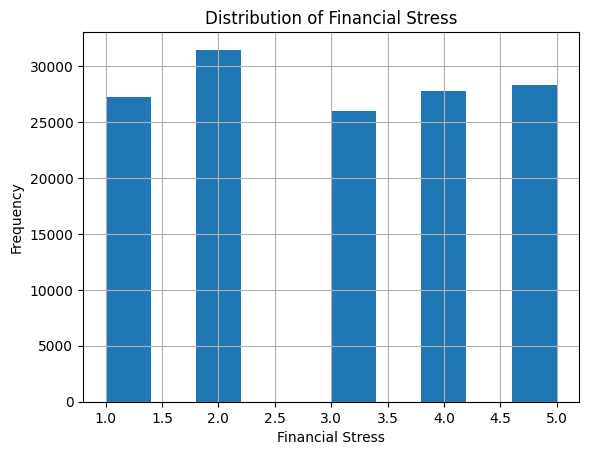

In [ ]:
rate = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Age', 'Work/Study Hours', 'Financial Stress']

for col in rate:
  df[col].hist()
  plt.title('Distribution of '+col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

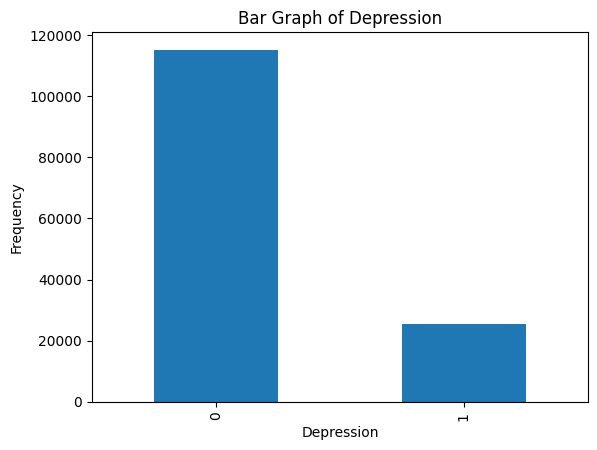

In [ ]:
df['Depression'].value_counts().plot(kind='bar')

plt.xlabel('Depression')
plt.ylabel('Frequency')
plt.title('Bar Graph of Depression')
plt.show()

In [ ]:
df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

A clear imbalance is displayed, with a ratio of about 4.5:1, meaning there are approximately 4.5 times as many non-depression cases as there are depression cases.

This imbalance could impact the performance of machine learning models trained on this data. Models might be biased towards predicting the majority class (non-depression), potentially leading to higher misclassification rates for the minority class (depression).

Despite this imbalance, we have chosen to proceed without resampling initially. This decision is informed by the fact that the observed distribution mirrors real-world prevalence, where individuals without depression are more than those with depression. We plan to first evaluate how well models perform under these conditions and subsequently determine if techniques such as resampling are necessary to improve model score and fairness.

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
print(df['City'].unique())
print(df['City'].value_counts())
print(df['City'].value_counts().values)

['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']
City
Kalyan                6591
Patna                 59

In [ ]:
print(df['Degree'].unique())
print(df['Degree'].value_counts())
print(df['Degree'].value_counts().values)

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']
Degree
Class 12                14729

In [ ]:
print(df['Profession'].unique())
print(df['Profession'].value_counts())
print(df['Profession'].value_counts().values)

['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']
Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager

In [ ]:
df.select_dtypes(include='number').corr()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075956,-0.098924,0.005129,0.008862,0.030793,-0.118356,-0.083589,-0.564671
Academic Pressure,-0.075956,1.000000,NaN,-0.025195,-0.112228,-1.000000,0.095650,0.152105,0.475037
Work Pressure,-0.098924,NaN,1.000000,NaN,NaN,-0.036958,-0.002808,0.024412,0.216634
CGPA,0.005129,-0.025195,NaN,1.000000,-0.047078,1.000000,0.002875,0.006398,0.021729
Study Satisfaction,0.008862,-0.112228,NaN,-0.047078,1.000000,-1.000000,-0.036934,-0.065001,-0.168014
Job Satisfaction,0.030793,-1.000000,-0.036958,1.000000,-1.000000,1.000000,-0.029227,-0.029160,-0.168543
Work/Study Hours,-0.118356,0.095650,-0.002808,0.002875,-0.036934,-0.029227,1.000000,0.036134,0.191746
Financial Stress,-0.083589,0.152105,0.024412,0.006398,-0.065001,-0.029160,0.036134,1.000000,0.227237
Depression,-0.564671,0.475037,0.216634,0.021729,-0.168014,-0.168543,0.191746,0.227237,1.000000


In [ ]:
df[df['Academic Pressure'].isna() & df['Work Pressure'].isna()]

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
15846,Shrey,Male,53.0,Vasai-Virar,Working Professional,NaN,NaN,NaN,NaN,NaN,5.0,More than 8 hours,Unhealthy,Class 12,No,12.0,1.0,No,0
17549,Tanya,Female,20.0,Patna,Student,NaN,NaN,NaN,5.55,NaN,NaN,5-6 hours,Moderate,Class 12,No,0.0,3.0,Yes,0
34694,Kriti,Female,46.0,Meerut,Working Professional,NaN,NaN,NaN,NaN,NaN,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,No,0
35612,Siddhesh,Male,27.0,Vadodara,Working Professional,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,No,1
57196,Manvi,Female,20.0,Visakhapatnam,Working Professional,NaN,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Moderate,Class 12,No,0.0,4.0,Yes,1
60348,Nishant,Male,29.0,Agra,Working Professional,NaN,NaN,NaN,9.72,2.0,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0
70453,Veda,Female,20.0,Ahmedabad,Student,NaN,NaN,NaN,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
76104,Vanya,Female,20.0,Nashik,Working Professional,NaN,NaN,NaN,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,No,11.0,1.0,No,1
85126,Monika,Female,27.0,Kanpur,Working Professional,Mechanical Engineer,NaN,NaN,NaN,NaN,5.0,5-6 hours,Healthy,BE,Yes,10.0,5.0,No,1
86606,Tushar,Male,18.0,Thane,Working Professional,NaN,NaN,NaN,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,10.0,3.0,No,1


## Data Preprocessing & Feature Selection

As a result of our data exploration, we've decided to proprocess the dataset and conduct feature selection as follow:

**`City`**: The `City` column was removed from our dataset as it contained numerous unique entries from India, and we lacked the necessary context to effectively utilize it as a categorical variable. This decision was made to streamline our dataset and focus on variables with clearer implications for our analysis.

**`Job Satisfaction` & `Study Satisfaction`**: These two variables contain lots of missing values as working professionals do not have study satisfaction and students do not have job satisfaction. There fore, they were combined to create a new `Satisfaction` column. If both `Job Satisfaction` and `Study Satisfaction` were both present, their average was taken; otherwise, we used whichever was available. This approach allows us to maintain a comprehensive measure of overall satisfaction without losing data.

**`Academic Pressure` & `Work Pressure`**: Similarly to satisfaction, `Academic Pressure` and `Work Pressure` were merged into a single `Pressure` column. This new column represents a unified measure of stress, taking the average of both pressures when available, or substituting one for the other when only one type of pressure is reported. This ensures we capture an overall stress level for each respondent.

**`Dietary Habits`**: The `Dietary Habits` were categorized into `Moderate`, `Unhealthy`, and `Healthy` using predefined mappings that also consider less straightforward classifications such as `More Healthy` and `Less Healthy`. This helps to standardize the data and facilitate more consistent analysis of dietary impacts on depression. All missing values are filled as `Moderate`

**`Sleep Duration`**: This variable was simplified into three categories: `Under 6 hours`, `6 to 8 hours`, and `More than 8 hours`. The mapping was designed to reflect general sleep duration groups, allowing for easier analysis of sleep`s effect on mental health. Missing values are filled as `6 to 8 hours` as it's a common case in real life.

**`Profession`** (related to `Long_Sit` and `Talk` mappings): The `Profession` data was used to derive two new variables, `Long_Sit` and `Talk`. These variables indicate the likelihood of prolonged sitting and the frequency of talking in various professions, respectively. Mappings were applied to transform the profession data into these two actionable binary variables, enhancing our analysis of workplace habits. All missing values are filled as 1 for Long_Sit and 0 for Talk as per to the modern daily life for people today.

**`Degree`**: The `Degree` information was standardized by mapping various specific degrees to broader categories such as `Bachelor`, `Master`, `PhD`, and `Professional`. This not only simplifies the educational qualification data but also ensures consistency in analyzing the educational background's influence on depression. All missing values are filled as `Bachelor` as it's the most common degree in the dataset.

After the described transformation made, we removed all the original columns.

In [ ]:
data = df.copy()

In [ ]:
# Handling 'Academic Pressure' and 'Work Pressure'
data['Pressure'] = np.where(data['Academic Pressure'].notna() & data['Work Pressure'].notna(),
                            (data['Academic Pressure'] + data['Work Pressure']) / 2,
                            data['Academic Pressure'].combine_first(data['Work Pressure']))

In [ ]:
# Handling 'Study Satisfaction' and 'Job Satisfaction'
data['Satisfaction'] = np.where(data['Study Satisfaction'].notna() & data['Job Satisfaction'].notna(),
                                (data['Study Satisfaction'] + data['Job Satisfaction']) / 2,
                                data['Study Satisfaction'].combine_first(data['Job Satisfaction']))

In [ ]:
data.isna().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                            

In [ ]:
data = data.dropna(subset=['Pressure', 'Satisfaction', 'Dietary Habits'])

In [ ]:
data.isna().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36600
Academic Pressure                        112775
Work Pressure                             27892
CGPA                                     112777
Study Satisfaction                       112775
Job Satisfaction                          27890
Sleep Duration                                0
Dietary Habits                                0
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                      0
Satisfaction                            

In [ ]:
# Mapping for Long_Sit
long_sit_mapping = {
    'Teacher': 0, 'Content Writer': 1, 'Architect': 1, 'Consultant': 1, 'HR Manager': 1,
    'Pharmacist': 0, 'Doctor': 0, 'Business Analyst': 1, 'Entrepreneur': 0, 'Chemist': 1,
    'Chef': 0, 'Educational Consultant': 1, 'Data Scientist': 1, 'Researcher': 1, 'Lawyer': 0,
    'Customer Support': 1, 'Marketing Manager': 1, 'Pilot': 1, 'Travel Consultant': 1, 'Plumber': 0,
    'Sales Executive': 0, 'Manager': 1, 'Judge': 0, 'Electrician': 0, 'Financial Analyst': 1,
    'Software Engineer': 1, 'Civil Engineer': 0, 'UX/UI Designer': 1, 'Digital Marketer': 1,
    'Accountant': 1, 'Finanancial Analyst': 1, 'Mechanical Engineer': 0, 'Graphic Designer': 1,
    'Research Analyst': 1, 'Investment Banker': 0
}

# Mapping for Talk
talk_mapping = {
    'Teacher': 1, 'Content Writer': 0, 'Architect': 1, 'Consultant': 1, 'HR Manager': 1,
    'Pharmacist': 1, 'Doctor': 1, 'Business Analyst': 1, 'Entrepreneur': 1, 'Chemist': 0,
    'Chef': 0, 'Educational Consultant': 1, 'Data Scientist': 0, 'Researcher': 0, 'Lawyer': 1,
    'Customer Support': 1, 'Marketing Manager': 1, 'Pilot': 1, 'Travel Consultant': 1, 'Plumber': 0,
    'Sales Executive': 1, 'Manager': 1, 'Judge': 1, 'Electrician': 0, 'Financial Analyst': 0,
    'Software Engineer': 0, 'Civil Engineer': 1, 'UX/UI Designer': 1, 'Digital Marketer': 1,
    'Accountant': 0, 'Finanancial Analyst': 0, 'Mechanical Engineer': 0, 'Graphic Designer': 0,
    'Research Analyst': 0, 'Investment Banker': 1
}


In [ ]:
# Apply mappings
data['Long_Sit'] = data['Profession'].map(long_sit_mapping).fillna(1).astype(int)  # Default is 1
data['Talk'] = data['Profession'].map(talk_mapping).fillna(0).astype(int)  # Default is 0

In [ ]:
data.isna().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36600
Academic Pressure                        112775
Work Pressure                             27892
CGPA                                     112777
Study Satisfaction                       112775
Job Satisfaction                          27890
Sleep Duration                                0
Dietary Habits                                0
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                      0
Satisfaction                            

In [ ]:
print(df['Sleep Duration'].unique())
print(df['Sleep Duration'].value_counts())
print(df['Sleep Duration'].value_counts().values)

['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours'
 'Sleep_Duration' '1-2 hours' '6-8 hours' '4-6 hours' '6-7 hours'
 '10-11 hours' '8-9 hours' '40-45 hours' '9-11 hours' '2-3 hours'
 '3-4 hours' 'Moderate' '55-66 hours' '4-5 hours' '9-6 hours' '1-3 hours'
 'Indore' '45' '1-6 hours' '35-36 hours' '8 hours' 'No' '10-6 hours'
 'than 5 hours' '49 hours' 'Unhealthy' 'Work_Study_Hours' '3-6 hours'
 '45-48 hours' '9-5' 'Pune' '9-5 hours']
Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                  

In [ ]:
sleep_duration_mapping = {
    'Less than 5 hours': 'Under 6',
    '7-8 hours': '6 to 8',
    'More than 8 hours': 'More than 8',
    '5-6 hours': 'Under 6',
    '3-4 hours': 'Under 6',
    '6-7 hours': '6 to 8',
    '4-5 hours': 'Under 6',
    '2-3 hours': 'Under 6',
    '4-6 hours': 'Under 6',
    '6-8 hours': '6 to 8',
    '1-6 hours': 'Under 6',
    '9-11 hours': 'More than 8',
    '10-11 hours': 'More than 8',
    '8-9 hours': 'More than 8',
    '3-6 hours': 'Under 6',
    'than 5 hours': 'Under 6',
    '9-6 hours': '6 to 8',
    '8 hours': 'More than 8',
    '1-3 hours': 'Under 6',
    '1-2 hours': 'Under 6'
}


In [ ]:
data['Sleep'] = df['Sleep Duration'].map(sleep_duration_mapping)

In [ ]:
data['Sleep'].isna().sum()

22

In [ ]:
print(data['Sleep'].value_counts())

Sleep
Under 6        70943
6 to 8         36976
More than 8    32726
Name: count, dtype: int64


In [ ]:
data['Sleep'] = data['Sleep'].fillna("6 to 8")
data['Sleep'].isna().sum()

0

In [ ]:
degree_mapping = {
    'Class 12': 'High School',
    'B.Ed': 'Bachelor',
    'B.Arch': 'Bachelor',
    'B.Com': 'Bachelor',
    'B.Pharm': 'Bachelor',
    'BCA': 'Bachelor',
    'BBA': 'Bachelor',
    'BSc': 'Bachelor',
    'B.Tech': 'Bachelor',
    'LLB': 'Bachelor',
    'BHM': 'Bachelor',
    'BA': 'Bachelor',
    'BE': 'Bachelor',
    'MBBS': 'Bachelor',
    'BArch': 'Bachelor',
    'BPharm': 'Bachelor',
    'BEd': 'Bachelor',
    'B.Sc': 'Bachelor',
    'B': 'Bachelor',
    'B.Student': 'Bachelor',
    'BB': 'Bachelor',
    'B B.Com': 'Bachelor',
    'B.B.Arch': 'Bachelor',
    'B BA': 'Bachelor',
    'M.Ed': 'Master',
    'MCA': 'Master',
    'MSc': 'Master',
    'LLM': 'Master',
    'M.Pharm': 'Master',
    'M.Tech': 'Master',
    'MBA': 'Master',
    'ME': 'Master',
    'MD': 'Master',
    'MHM': 'Master',
    'M.Com': 'Master',
    'MA': 'Master',
    'M.Arch': 'Master',
    'MEd': 'Master',
    'MPharm': 'Master',
    'M_Tech': 'Master',
    'M.S': 'Master',
    'M': 'Master',
    'PhD': 'PhD',
    'P.Com': 'Professional',
    'LL B.Ed': 'Professional',
    'L.Ed': 'Professional',
    'HCA': 'Professional',
    'LLS': 'Professional',
    'LCA': 'Professional',
    'LL.Com': 'Professional',
    'LLBA': 'Professional',
    'P.Pharm': 'Professional',
    'H_Pharm': 'Professional',
    'S.Pharm': 'Professional',
    'ACA': 'Professional',
    'MPA': 'Professional',
    'Data Scientist': 'Master',
    'Business Analyst': 'Bachelor',
    'HR Manager': 'Bachelor',
    'Doctor': 'PhD',
    'Plumber': 'Professional',
    'Working Professional': 'Professional'
}


In [ ]:
data['Degree'] = df['Degree'].map(degree_mapping)

In [ ]:
print(data['Degree'].value_counts())

Degree
Bachelor        73223
Master          49549
High School     14708
PhD              3104
Professional       19
Name: count, dtype: int64


In [ ]:
data['Degree'] = data['Degree'].fillna('Bachelor')

In [ ]:
data['Degree'].isna().sum()

0

In [ ]:
print(df['Dietary Habits'].unique())
print(df['Dietary Habits'].value_counts())
print(df['Dietary Habits'].value_counts().values)

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']
Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64
[49705 46227 44741     2     2     2     1     1     1     1     1     1
     1     1     1     1     1   

In [ ]:
dietary_habits_mapping = {
    'Moderate': 'Moderate',
    'Unhealthy': 'Unhealthy',
    'Healthy': 'Healthy',
    'More Healthy': 'Healthy',
    'No Healthy': 'Unhealthy',
    'Less Healthy': 'Moderate',  # Less healthy likely leans towards moderate rather than fully unhealthy
    'Less than Healthy': 'Moderate',
}

In [ ]:
data['Diet'] = df['Dietary Habits'].map(dietary_habits_mapping)
print(data['Diet'].value_counts())

Diet
Moderate     49691
Unhealthy    46220
Healthy      44738
Name: count, dtype: int64


In [ ]:
data['Diet'].isna().sum()

18

In [ ]:
data['Diet'] = data['Diet'].fillna('Moderate')
print(data['Diet'].value_counts())
print(data['Diet'].isna().sum())

Diet
Moderate     49709
Unhealthy    46220
Healthy      44738
Name: count, dtype: int64
0


In [ ]:
# Drop the original columns if they are no longer needed
data = data.drop(columns=['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Profession',
                          'CGPA', 'City', 'Name', 'Sleep Duration', 'Dietary Habits'])

In [ ]:
data[data.select_dtypes(exclude=['number', 'bool']).columns].nunique()

Gender                                   2
Working Professional or Student          2
Degree                                   5
Have you ever had suicidal thoughts ?    2
Family History of Mental Illness         2
Sleep                                    3
Diet                                     3
dtype: int64

In [ ]:
data['Financial Stress'].mode()

0    2.0
Name: Financial Stress, dtype: float64

In [ ]:
data['Financial Stress'] = data['Financial Stress'].fillna(data['Financial Stress'].mode()[0])

In [ ]:
data.isna().sum()

Gender                                   0
Age                                      0
Working Professional or Student          0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
Long_Sit                                 0
Talk                                     0
Sleep                                    0
Diet                                     0
dtype: int64

In [ ]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
# Check the new column names
print(data.columns)

Index(['gender', 'age', 'working_professional_or_student', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression',
       'pressure', 'satisfaction', 'long_sit', 'talk', 'sleep', 'diet'],
      dtype='object')


In [ ]:
numeric_features = ['age', 'work/study_hours', 'financial_stress', 'pressure', 'satisfaction']

categorical_features = ['gender', 'working_professional_or_student', 'degree', 'have_you_ever_had_suicidal_thoughts_?',
                        'family_history_of_mental_illness', 'sleep', 'diet']


## Model Selection

In [ ]:
# One-hot encoding categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features)

# Splitting the data into features and target
X = data_encoded.drop('depression', axis=1)  # Features
y = data_encoded['depression']  # Target

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the outputs
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112533, 26)
X_test shape: (28134, 26)
y_train shape: (112533,)
y_test shape: (28134,)


In [ ]:
X_train.columns

Index(['age', 'work/study_hours', 'financial_stress', 'pressure',
       'satisfaction', 'long_sit', 'talk', 'gender_Female', 'gender_Male',
       'working_professional_or_student_Student',
       'working_professional_or_student_Working Professional',
       'degree_Bachelor', 'degree_High School', 'degree_Master', 'degree_PhD',
       'degree_Professional', 'have_you_ever_had_suicidal_thoughts_?_No',
       'have_you_ever_had_suicidal_thoughts_?_Yes',
       'family_history_of_mental_illness_No',
       'family_history_of_mental_illness_Yes', 'sleep_6 to 8',
       'sleep_More than 8', 'sleep_Under 6', 'diet_Healthy', 'diet_Moderate',
       'diet_Unhealthy'],
      dtype='object')

In [ ]:
# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]  # This extracts the coefficients for the model (assuming binary classification)

# Create a Series for better visualization, with column names as index
feature_importance = pd.Series(coefficients, index=X_train.columns)

# Print feature importance
print("Feature Importance:")
print(feature_importance)

# To display absolute values which represent the magnitude of impact (ignoring direction):
print("\nFeature Importance (Absolute Values):")
print(feature_importance.abs().sort_values(ascending=False))


Feature Importance:
age                                                    -0.166107
work/study_hours                                        0.134177
financial_stress                                        0.547544
pressure                                                0.724749
satisfaction                                           -0.406302
long_sit                                                0.132946
talk                                                   -0.059329
gender_Female                                          -0.051857
gender_Male                                            -0.031041
working_professional_or_student_Student                 0.887110
working_professional_or_student_Working Professional   -0.970008
degree_Bachelor                                        -0.068644
degree_High School                                     -0.118235
degree_Master                                          -0.091431
degree_PhD                                              0.205575
degre

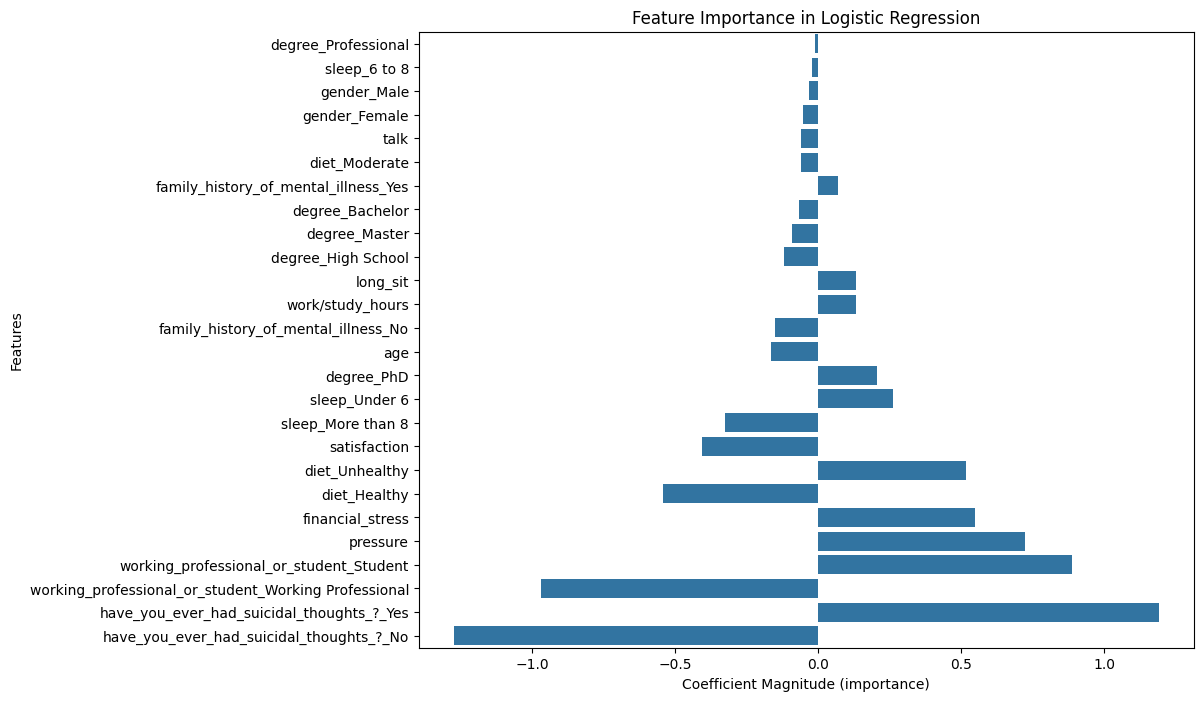

In [ ]:
# Sorting the features by absolute importance
sorted_idx = feature_importance.abs().sort_values().index

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[sorted_idx], y=sorted_idx)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Magnitude (importance)')
plt.ylabel('Features')
plt.show()


In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Detailed classification report for one model
print("Detailed classification report for Random Forest:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9360204734484965
Detailed classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22951
           1       0.85      0.80      0.82      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.88      0.89     28134
weighted avg       0.93      0.94      0.94     28134



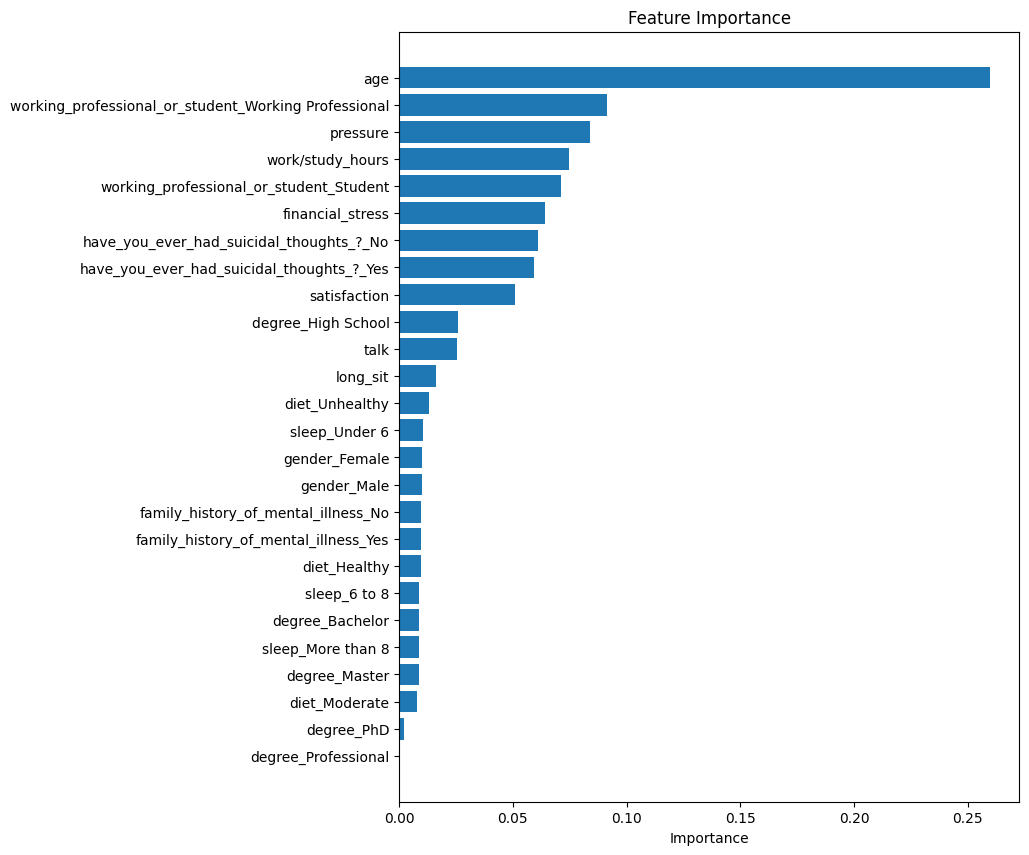

In [ ]:
# Get feature importances
importances = random_forest.feature_importances_
# Get the feature names
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as necessary
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), names)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.xlabel('Importance')
plt.show()

In [ ]:
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_pred = gradient_boosting.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

# Detailed classification report for one model
print("Detailed classification report for Gradient Boosting:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9400014217672567
Detailed classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22951
           1       0.85      0.82      0.83      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.89      0.90     28134
weighted avg       0.94      0.94      0.94     28134



[5.29510328e-01 1.44729887e-02 4.59725561e-02 8.16805067e-02
 1.80612983e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.45329373e-02 2.28717588e-02 0.00000000e+00
 7.80351694e-04 0.00000000e+00 1.56838517e-05 0.00000000e+00
 1.70528270e-01 3.12463579e-02 1.38808946e-05 1.37450014e-04
 0.00000000e+00 6.08112249e-04 7.21044276e-04 2.60008369e-03
 0.00000000e+00 6.24639139e-03]


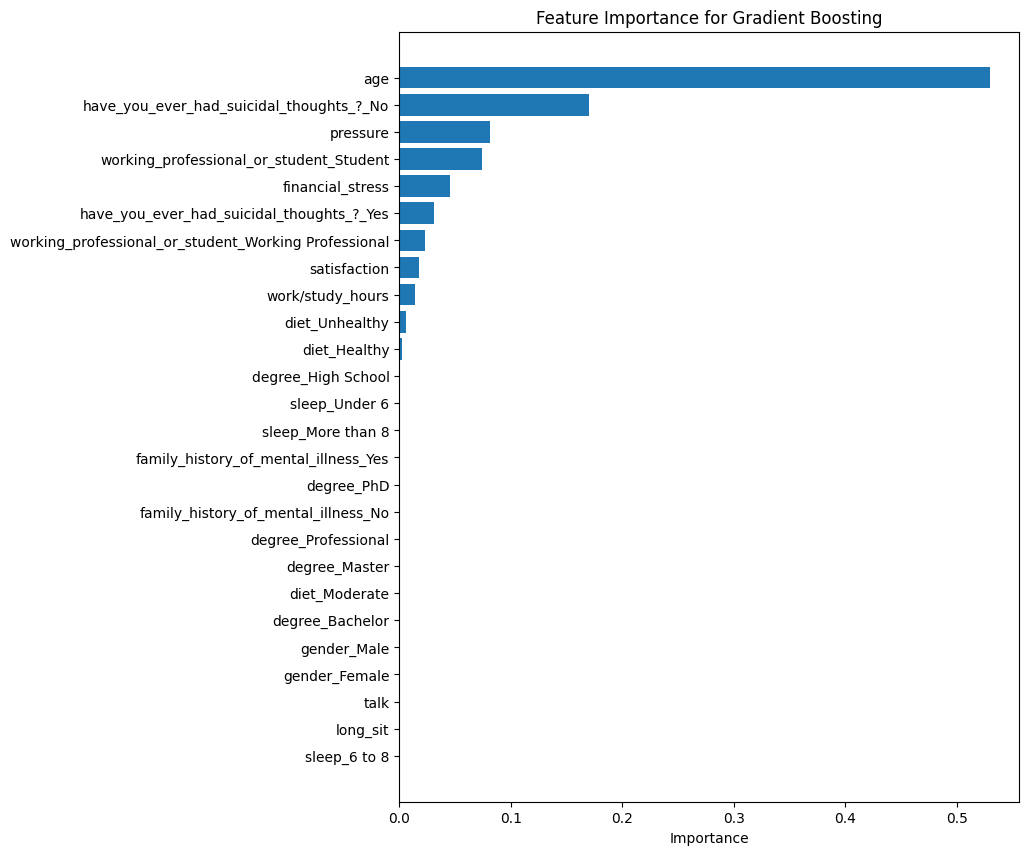

In [ ]:
# Get feature importances
importances_gb = gradient_boosting.feature_importances_
print(importances_gb)

# Get the feature names
features = X_train.columns

# Sort feature importances in descending order
indices_gb = np.argsort(importances_gb)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_gb = [features[i] for i in indices_gb]

# Create plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as necessary
plt.title("Feature Importance for Gradient Boosting")
plt.barh(range(X_train.shape[1]), importances_gb[indices_gb], align='center')
plt.yticks(range(X_train.shape[1]), names_gb)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.xlabel('Importance')
plt.show()

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

print("Detailed classification report for KNN:")
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.9273121490012085
Detailed classification report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22951
           1       0.80      0.80      0.80      5183

    accuracy                           0.93     28134
   macro avg       0.88      0.88      0.88     28134
weighted avg       0.93      0.93      0.93     28134



Since all models perform well and closely, we decided to tune the hyperparameters for all of them to seek for optimal model.

## Hyperparameter Tuning

In [ ]:
'''
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

# Detailed classification report for one model
print("Detailed classification report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))
'''

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print results
print("Best Parameters:", best_params)
print("Best Model F1-Score on Test Set:", f1_score(y_test, y_pred, average='weighted'))
print("Best Model Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/opt/anaconda3/envs/stsci5740/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/stsci5740/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/stsci5740/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/stsci5740/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/stsci5740/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/stsci5740/

Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model F1-Score on Test Set: 0.9378555632125559
Best Model Accuracy on Test Set: 0.9383308452406341
Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22951
           1       0.85      0.81      0.83      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.89      0.90     28134
weighted avg       0.94      0.94      0.94     28134



In [ ]:
# Get the coefficients from the best logistic regression model
coefficients = best_model.coef_[0]  # This extracts the coefficients for the model (assuming binary classification)

# Create a Series for better visualization, with column names as index
feature_importance = pd.Series(coefficients, index=X_train.columns)

# Print feature importance
print("Feature Importance:")
print(feature_importance)

# To display absolute values which represent the magnitude of impact (ignoring direction):
print("\nFeature Importance (Absolute Values):")
print(feature_importance.abs().sort_values(ascending=False))


Feature Importance:
age                                                    -0.165681
work/study_hours                                        0.131444
financial_stress                                        0.530603
pressure                                                0.701562
satisfaction                                           -0.394080
long_sit                                                0.130637
talk                                                   -0.118953
gender_Female                                          -0.034142
gender_Male                                            -0.012791
working_professional_or_student_Student                 0.826957
working_professional_or_student_Working Professional   -0.873890
degree_Bachelor                                        -0.026750
degree_High School                                     -0.119793
degree_Master                                          -0.042466
degree_PhD                                              0.149128
degre

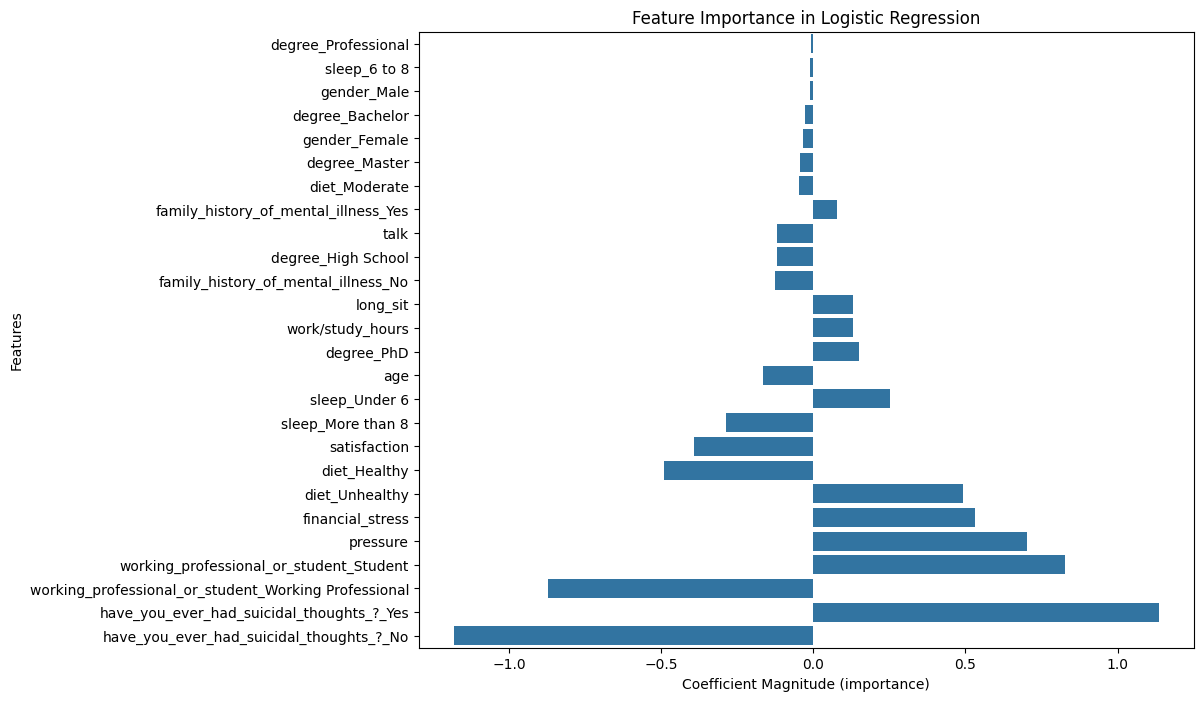

In [ ]:
# Sorting the features by absolute importance
sorted_idx = feature_importance.abs().sort_values().index

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[sorted_idx], y=sorted_idx)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Magnitude (importance)')
plt.ylabel('Features')
plt.show()


In [ ]:
'''
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Detailed classification report for one model
print("Detailed classification report for Random Forest:")
print(classification_report(y_test, rf_pred))
'''
# Random Forest with adjusted hyperparameters
random_forest = RandomForestClassifier(
    n_estimators=600,          # Increase the number of trees
    max_depth=30,              # Limit the depth of the trees to prevent overfitting
    min_samples_split=5,       # Increase the minimum samples required to split a node
    min_samples_leaf=3,        # Increase the minimum samples required in a leaf node
    max_features='sqrt',       # Use the square root of features for each split
    #criterion='entropy',         # Use entropy instead of Gini
    bootstrap=True,              # Use bootstrap sampling
    max_samples=0.9,             # Use 90% of the dataset for each tree
    oob_score=True,
    random_state=40            # Ensure reproducibility
)

# Train and evaluate the model
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Detailed classification report for Random Forest:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9384730219663041
Detailed classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22951
           1       0.85      0.81      0.83      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.89      0.90     28134
weighted avg       0.94      0.94      0.94     28134



In [ ]:
# Compute F1-scores
from sklearn.metrics import classification_report, accuracy_score, f1_score
f1_macro = f1_score(y_test, rf_pred, average='macro')  # Macro average (treats all classes equally)
f1_weighted = f1_score(y_test, rf_pred, average='weighted')  # Weighted average (accounts for class imbalance)

print("Macro F1-Score:", f1_macro)
print("Weighted F1-Score:", f1_weighted)

Macro F1-Score: 0.8957937416490882
Weighted F1-Score: 0.9379112341609622


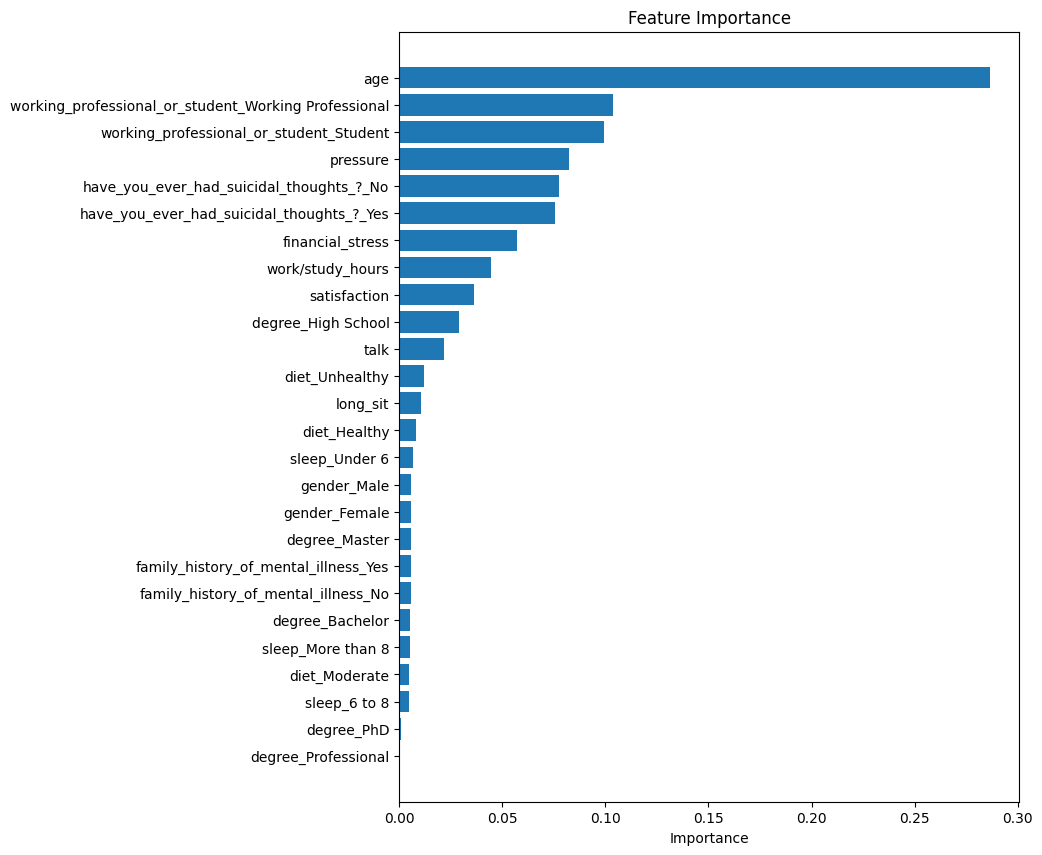

In [ ]:
# Get feature importances
importances = random_forest.feature_importances_
# Get the feature names
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as necessary
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), names)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.xlabel('Importance')
plt.show()

In [ ]:
'''
# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
gb_pred = gradient_boosting.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

# Detailed classification report for one model
print("Detailed classification report for Gradient Boosting:")
print(classification_report(y_test, gb_pred))
'''

# Gradient Boosting with tuned parameters
gradient_boosting = GradientBoostingClassifier(
    n_estimators=500,          # Number of trees
    learning_rate=0.05,        # Shrinkage of each tree’s contribution
    max_depth=5,               # Maximum depth of trees
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples in a leaf node
    subsample=0.8,             # Fraction of samples used for fitting
    max_features='sqrt',       # Features considered for each split
    random_state=42
)

# Train and predict
gradient_boosting.fit(X_train, y_train)
gb_pred = gradient_boosting.predict(X_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Detailed classification report for Gradient Boosting:")
print(classification_report(y_test, gb_pred))

# Compute F1-scores
f1_macro = f1_score(y_test, gb_pred, average='macro')
f1_weighted = f1_score(y_test, gb_pred, average='weighted')
print("Macro F1-Score:", f1_macro)
print("Weighted F1-Score:", f1_weighted)

Gradient Boosting Accuracy: 0.9405345844885192
Detailed classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22951
           1       0.85      0.83      0.84      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.90      0.90     28134
weighted avg       0.94      0.94      0.94     28134

Macro F1-Score: 0.9002655042451444
Weighted F1-Score: 0.9402890550514479


[2.69660143e-01 2.27326547e-02 5.91468033e-02 8.76550490e-02
 2.59216472e-02 3.71319555e-03 2.02816108e-02 5.01211660e-04
 5.35322176e-04 7.33544268e-02 2.05981231e-01 4.37465020e-04
 4.09937593e-02 1.69733982e-03 3.70752777e-04 2.06126172e-05
 6.09301364e-02 1.02107619e-01 7.14268629e-04 6.06911547e-04
 3.97540458e-04 2.05987345e-03 1.91412490e-03 5.25302516e-03
 8.97156694e-04 1.21161196e-02]


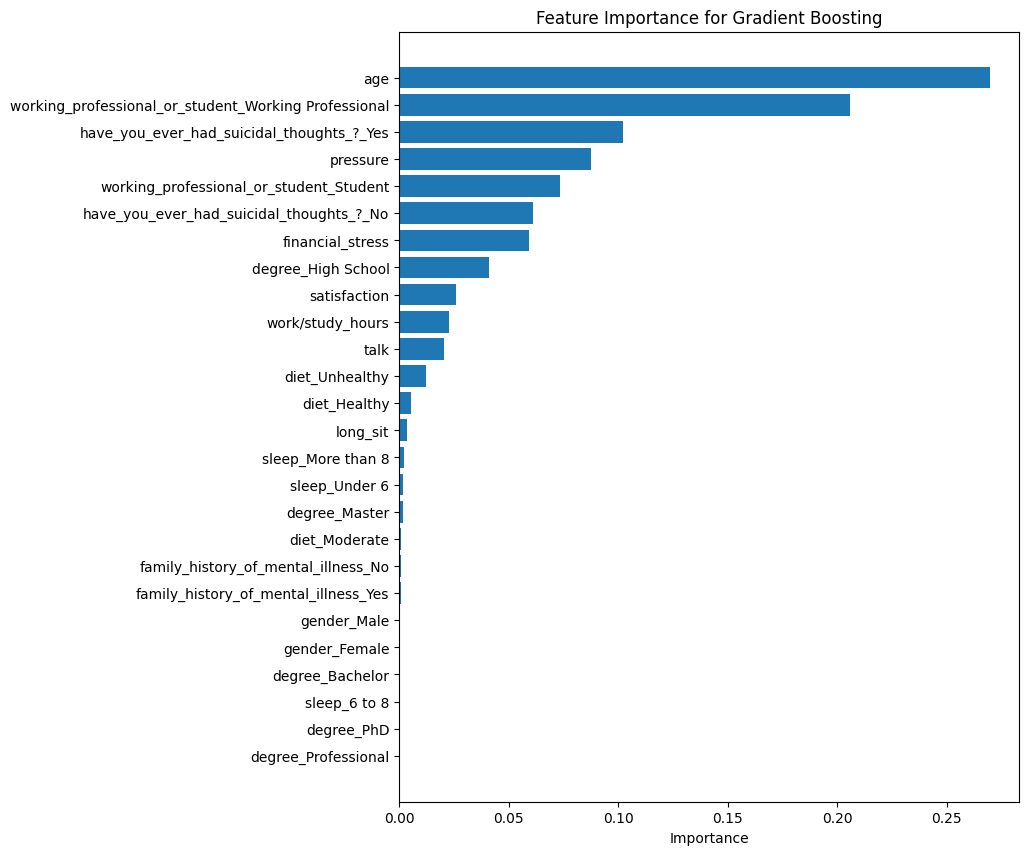

In [ ]:
# Get feature importances
importances_gb = gradient_boosting.feature_importances_
print(importances_gb)

# Get the feature names
features = X_train.columns

# Sort feature importances in descending order
indices_gb = np.argsort(importances_gb)[::-1]

# Rearrange feature names so they match the sorted feature importances
names_gb = [features[i] for i in indices_gb]

# Create plot
plt.figure(figsize=(8, 10))  # Adjust the figure size as necessary
plt.title("Feature Importance for Gradient Boosting")
plt.barh(range(X_train.shape[1]), importances_gb[indices_gb], align='center')
plt.yticks(range(X_train.shape[1]), names_gb)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.xlabel('Importance')
plt.show()

In [ ]:
# K-Nearest Neighbors
'''
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

print("Detailed classification report for KNN:")
print(classification_report(y_test, knn_pred))
'''

knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='minkowski', p=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Detailed classification report for KNN:")
print(classification_report(y_test, knn_pred))



KNN Accuracy: 0.9327504087580863
Detailed classification report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22951
           1       0.82      0.82      0.82      5183

    accuracy                           0.93     28134
   macro avg       0.89      0.89      0.89     28134
weighted avg       0.93      0.93      0.93     28134



In [ ]:
X_train.columns

Index(['age', 'work/study_hours', 'financial_stress', 'pressure',
       'satisfaction', 'long_sit', 'talk', 'gender_Female', 'gender_Male',
       'working_professional_or_student_Student',
       'working_professional_or_student_Working Professional',
       'degree_Bachelor', 'degree_High School', 'degree_Master', 'degree_PhD',
       'degree_Professional', 'have_you_ever_had_suicidal_thoughts_?_No',
       'have_you_ever_had_suicidal_thoughts_?_Yes',
       'family_history_of_mental_illness_No',
       'family_history_of_mental_illness_Yes', 'sleep_6 to 8',
       'sleep_More than 8', 'sleep_Under 6', 'diet_Healthy', 'diet_Moderate',
       'diet_Unhealthy'],
      dtype='object')

In [ ]:
X_train_new = X_train[['age', 'have_you_ever_had_suicidal_thoughts_?_No', 'pressure', 'working_professional_or_student_Student', 'financial_stress', 'working_professional_or_student_Working Professional',
                       'satisfaction', 'work/study_hours', 'diet_Healthy', 'diet_Unhealthy', 'family_history_of_mental_illness_Yes']]

X_test_new = X_test[['age', 'have_you_ever_had_suicidal_thoughts_?_No', 'pressure', 'working_professional_or_student_Student', 'financial_stress', 'working_professional_or_student_Working Professional',
                       'satisfaction', 'work/study_hours', 'diet_Healthy', 'diet_Unhealthy', 'family_history_of_mental_illness_Yes']]

In [ ]:
# Logistic Regression
#log_reg = LogisticRegression(max_iter=1000)
#log_reg.fit(X_train_new, y_train)
#log_reg_pred = log_reg.predict(X_test_new)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

# Detailed classification report for one model
print("Detailed classification report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))

# Random Forest Classifier
#random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
#random_forest.fit(X_train_new, y_train)
#rf_pred = random_forest.predict(X_test_new)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Detailed classification report for one model
print("Detailed classification report for Random Forest:")
print(classification_report(y_test, rf_pred))

# Gradient Boosting Classifier
#gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gradient_boosting.fit(X_train_new, y_train)
#gb_pred = gradient_boosting.predict(X_test_new)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

# Detailed classification report for one model
print("Detailed classification report for Gradient Boosting:")
print(classification_report(y_test, gb_pred))


# K-Nearest Neighbors
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train_new, y_train)
#knn_pred = knn.predict(X_test_new)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

print("Detailed classification report for KNN:")
print(classification_report(y_test, knn_pred))


Logistic Regression Accuracy: 0.9381531243335466
Detailed classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22951
           1       0.84      0.81      0.83      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.89      0.90     28134
weighted avg       0.94      0.94      0.94     28134

Random Forest Accuracy: 0.9384730219663041
Detailed classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22951
           1       0.85      0.81      0.83      5183

    accuracy                           0.94     28134
   macro avg       0.90      0.89      0.90     28134
weighted avg       0.94      0.94      0.94     28134

Gradient Boosting Accuracy: 0.9405345844885192
Detailed classification report for Gradient Boosting:
              precision    recall  f1-score   s

Deleting features with low importance in GB model did not help to improve performance of any of the models.

## **Part 2: Large Language Model**
## Installs and Imports

In [ ]:
pip install transformers datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [ ]:
def describe_patient(row):
    suicidal_thoughts = "has had suicidal thoughts" if row['have_you_ever_had_suicidal_thoughts_?'] else "has not had suicidal thoughts"
    family_history = "a family history of mental illness" if row['family_history_of_mental_illness'] else "no family history of mental illness"
    long_sit = "requires long sitting periods" if row['long_sit'] else "does not require long sitting periods"
    talk = "requires lots of social interaction" if row['talk'] else "does not require lots of social interaction"

    return (
        f"The patient, a {int(row['age'])}-year-old {row['gender'].lower()} and a {row['working_professional_or_student'].lower()} "
        f"with a {row['degree']} degree, {suicidal_thoughts}. This patient works or studies for approximately {row['work/study_hours']} hours daily, "
        f"rates their financial stress as {int(row['financial_stress'])} out of 5, and has {family_history}. They experience a pressure level of {int(row['pressure'])} out of 5, "
        f"and their job or study {long_sit}. Their job or study {talk}. They report a satisfaction level of {int(row['satisfaction'])} out of 5, "
        f"sleeps '{row['sleep']}' hours regularly, and describes their diet as {row['diet']}."
    )


## Data Preprocessing

In [ ]:
# Apply the function to create the description
data['text'] = data.apply(describe_patient, axis=1)

data = data.rename(columns={'depression': 'labels'})

# Splitting the DataFrame into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(train[['labels', 'text']])
test_dataset = Dataset.from_pandas(test[['labels', 'text']])

In [ ]:
print(train_dataset[0])
print(test_dataset[0])

{'labels': 1, 'text': "The patient, a 27-year-old male and a student with a Master degree, has had suicidal thoughts. This patient works or studies for approximately 7.0 hours daily, rates their financial stress as 5 out of 5, and has a family history of mental illness. They experience a pressure level of 4 out of 5, and their job or study requires long sitting periods. Their job or study does not require lots of social interaction. They report a satisfaction level of 2 out of 5, sleeps '6 to 8' hours regularly, and describes their diet as Healthy.", '__index_level_0__': 96253}
{'labels': 0, 'text': "The patient, a 41-year-old male and a working professional with a Bachelor degree, has had suicidal thoughts. This patient works or studies for approximately 12.0 hours daily, rates their financial stress as 1 out of 5, and has a family history of mental illness. They experience a pressure level of 1 out of 5, and their job or study requires long sitting periods. Their job or study require

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/112533 [00:00<?, ? examples/s]

In [ ]:
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/28134 [00:00<?, ? examples/s]

## Finetuning

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate

f1 = evaluate.load("f1")

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Convert logits to class predictions
    predictions = np.argmax(predictions, axis=1)
    # Calculate F1 score
    return f1.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "Not Depressed", 1: "Depressed"}
label2id = {"Not Depressed": 0, "Depressed": 1}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="text_classification",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,F1
1,0.194100,0.195329,0.778868
2,0.195700,0.184410,0.793120


TrainOutput(global_step=14068, training_loss=0.2036930710068812, metrics={'train_runtime': 2833.4849, 'train_samples_per_second': 79.431, 'train_steps_per_second': 4.965, 'total_flos': 7067274912556344.0, 'train_loss': 0.2036930710068812, 'epoch': 2.0})

## Insights

Confusion Matrix:
[[21994   957]
 [ 1148  4035]]


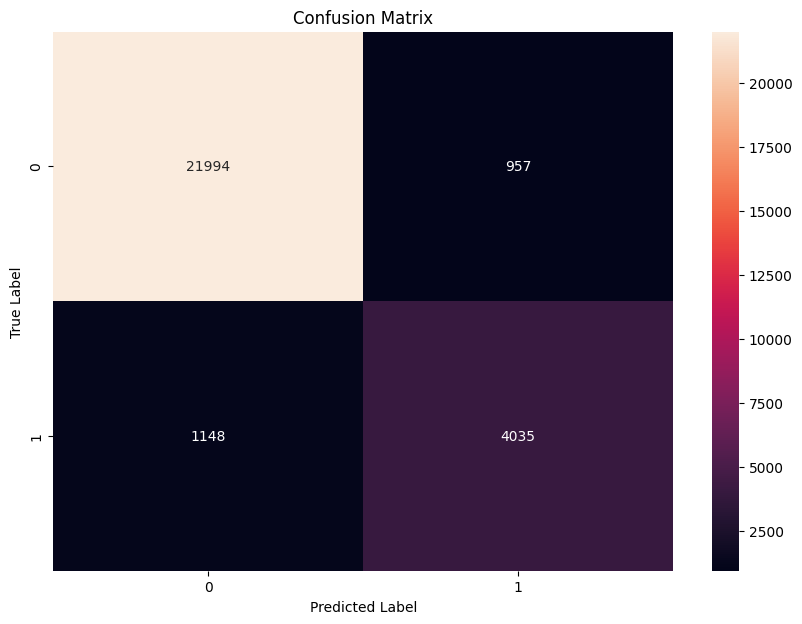

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Step 1: Get predictions
predictions_output = trainer.predict(tokenized_test)

# Step 2: Process predictions
predicted_labels = np.argmax(predictions_output.predictions, axis=1)

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(predictions_output.label_ids, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

# If you want to plot the confusion matrix (requires matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


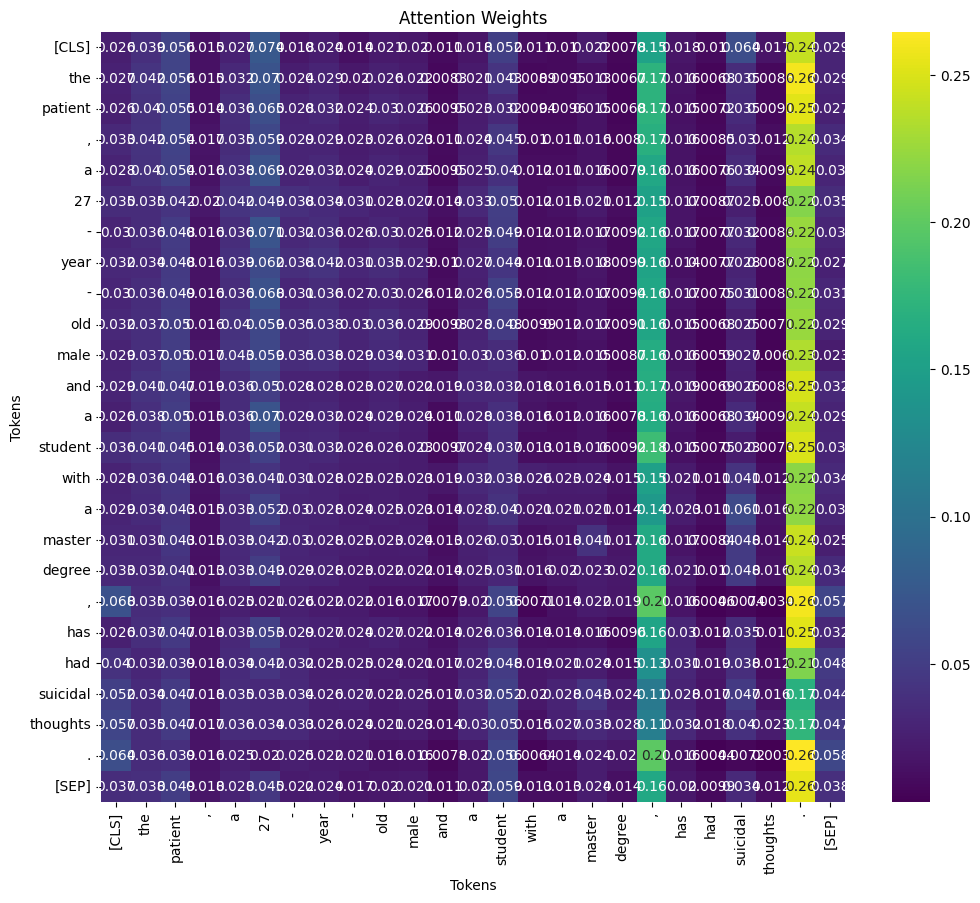

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('text_classification/checkpoint-14068')
model = AutoModelForSequenceClassification.from_pretrained('text_classification/checkpoint-14068', output_attentions=True, attn_implementation="eager")

# Example text
text = "The patient, a 27-year-old male and a student with a Master degree, has had suicidal thoughts."
inputs = tokenizer(text, return_tensors="pt", truncation=True)

# Forward pass to get attention weights
outputs = model(**inputs)
attentions = outputs.attentions[-1]  # Get the attentions from the last layer

# Get token strings for labels
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

# Average the attention weights across all heads
mean_attentions = attentions.mean(dim=1).squeeze()

plt.figure(figsize=(12, 10))
# Plot
sns.heatmap(mean_attentions.detach().numpy(), annot=True, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
plt.xlabel('Tokens')
plt.ylabel('Tokens')
plt.title('Attention Weights')
plt.show()


From the plot above, we notice that the model wasn't able to assign high attentions to important words.